# Trading options and gaining or losing money

You start with ¥ 10,000 and can buy as many of the following call options as you want.

* Cost of 1 call option: ¥ 100
* Strike price: ¥ 10,500
* According to your pricing model, the underlying stock will have a price at the option expiry date distributed according to Normal(¥ 10,500, (¥ 300)²). So, the strike price and the expected value of the stock price are the same.

Work through the tasks below to determine a good trading strategy for maximizing your gains and limiting your losses while trading these options.

## Getting started

Run the code cell below and understand how the output is computed. The output shows the (random) result of buying one call option and waiting until the option expiry date.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_money_at_option_expiry(
    money_at_start, options_purchased, price_per_option=100,
    strike_price=10500, expiry_price_mean=10500, expiry_price_stdev=300):

    '''
    Calculate how much money you have after buying some number of call
    options with a strike price of `strike_price`, and waiting for them to
    expire. The value of the underlying stock at expiry is a sample from a
    normal distribution with mean `expiry_price_mean` and standard
    deviation `expiry_price_stdev`.

    Arguments:

        money_at_start (float) How much money you have before buying the
          options.

        options_purchased (int) How many options you purchase.

        price_per_option (float) The price of 1 option.

        strike_price (float) The strike price of the option.

        expiry_price_mean (float) The mean of the normal distribution of
          the stock price at expiry.

        expiry_price_stdev (float) The standard deviation of the normal
          distribution of the stock price at expiry.

    All arguments can also be NumPy arrays instead of scalars.

    Returns: (float or array) the amount of money you have left after the
      options expired, based on the random sample(s) from the final stock
      price distribution.
    '''
    stock_price = np.random.normal(
        expiry_price_mean, expiry_price_stdev,
        size=np.shape(money_at_start))
    option_value_at_expiry = np.maximum(0, stock_price - strike_price)
    money_at_end = (
        money_at_start
        - options_purchased * price_per_option
        + options_purchased * option_value_at_expiry)
    return money_at_end

In [ ]:
# Buy 1 option and see what happens. You can run this cell a few times to
# see different random outcomes.

money_at_start = 10000
price_per_option = 100
options = 1

money_at_end = calculate_money_at_option_expiry(
    money_at_start, options, price_per_option)

print(f'We started with ¥ {money_at_start:.2f}')
print(f'We bought {options} option(s)')
print(f'We ended up with ¥ {money_at_end:.2f}')

We started with ¥ 10000.00
We bought 1 option(s)
We ended up with ¥ 10202.38


## Task 1

Use the function above to simulate buying 1 option 100,000 times and
plot a histogram of the results using 100 histogram bins. This histogram
will show the distribution over how much money you might have left
when starting with ¥ 10,000 and buying 1 option. Also, use your results
to compute the average, 25th, 50th, and 75th percentiles, and risk of
loss for this trade. (The risk of ruin is 0 since it's impossible to lose
all your money when buying only 1 option.)

1. Plot a histogram.
2. Compute the average amount of money you end up with and plot it on the histogram.
3. Compute the 25th, 50th, and 75th percentiles and plot them on the histogram.
4. Compute the risk of loss.

min: 9900.0, max: 11211.821157998718


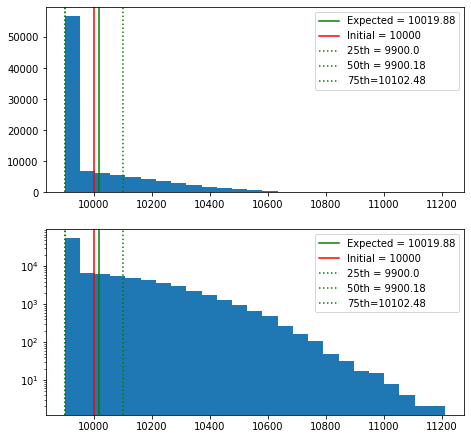

In [ ]:
# Run the simple simulation above 100,000 times and record results
import matplotlib.pyplot as plt

money_at_start = 10000
price_per_option = 100
options = 1

end_money = []

for i in range(100000):
    money_at_end = calculate_money_at_option_expiry(
        money_at_start, options, price_per_option)
    end_money.append(money_at_end)

print(f"min: {min(end_money)}, max: {max(end_money)}")

# Plot a histogram of the results and print out the metrics

fig, ax = plt.subplots(nrows=2, ncols=1,  figsize=(7.5,7.5))


ax[0].hist(end_money, bins=25)
ax[0].axvline(x = np.mean(end_money), label=f"Expected = {round(np.mean(end_money),2)}", color="g")
ax[0].axvline(x = money_at_start, label=f"Initial = {money_at_start}", color="r")
ax[0].axvline(x = np.percentile(end_money, 25), label=f"25th = {round(np.percentile(end_money, 25),2)}", linestyle=':', color="g")
ax[0].axvline(x = np.percentile(end_money, 50), label=f"50th = {round(np.percentile(end_money, 50),2)}", linestyle=':', color="g")
ax[0].axvline(x = np.percentile(end_money, 75), label=f"75th={round(np.percentile(end_money, 75),2)}", linestyle=':', color="g")
ax[0].legend()


ax[1].hist(end_money, bins=25, log=True)
ax[1].axvline(x = np.mean(end_money), label=f"Expected = {round(np.mean(end_money),2)}", color="g")
ax[1].axvline(x = money_at_start, label=f"Initial = {money_at_start}", color="r")
ax[1].axvline(x = np.percentile(end_money, 25), label=f"25th = {round(np.percentile(end_money, 25),2)}", linestyle=':', color="g")
ax[1].axvline(x = np.percentile(end_money, 50), label=f"50th = {round(np.percentile(end_money, 50),2)}", linestyle=':', color="g")
ax[1].axvline(x = np.percentile(end_money, 75), label=f"75th={round(np.percentile(end_money, 75),2)}", linestyle=':', color="g")
ax[1].legend()


plt.show()



## Task 2

You now get to play the game of risking some money on buying options repeatedly. To start with, assume you buy 1 option (as in Task 1) but you do it 20 times in sequence.

1. Buy 1 option and let it expire. You will now have a little more or less money than you started with.
2. Buy another option and let it expire.
3. You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.

Reuse and update your code from Task 1 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Task 1.

### Questions

1. Are we making money or losing money, on average?
2. What is the minimum amount of money we can end up with? Explain why.

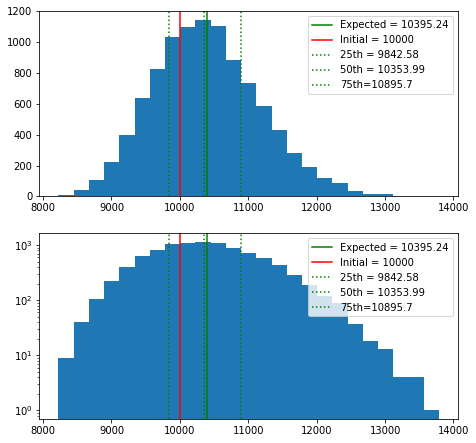

In [ ]:
# Compute the money left after 20 trades of 1 option for 100,000 trials

n_experiments = 10000

max_trades = 20
money_at_start = 10000
price_per_option = 100
options = 1

end_money = []

for experiment in range(n_experiments):
    current_money = money_at_start
    money_track = []
    for i in range(max_trades):
        if current_money < 100:
            print(f"YOU ARE TOO POOR TO GAMBLE. Current amount: {current_money}")
            break
        else:
            new_money = calculate_money_at_option_expiry(
                current_money, options, price_per_option)
        
        money_track.append(new_money)
        current_money = new_money
    # plt.plot(np.linspace(1,i+1,i+1), money_track) 
    # plt.show()
    end_money.append(current_money)

fig, ax = plt.subplots(nrows=2, ncols=1,  figsize=(7.5,7.5))


ax[0].hist(end_money, bins=25)
ax[0].axvline(x = np.mean(end_money), label=f"Expected = {round(np.mean(end_money),2)}", color="g")
ax[0].axvline(x = money_at_start, label=f"Initial = {money_at_start}", color="r")
ax[0].axvline(x = np.percentile(end_money, 25), label=f"25th = {round(np.percentile(end_money, 25),2)}", linestyle=':', color="g")
ax[0].axvline(x = np.percentile(end_money, 50), label=f"50th = {round(np.percentile(end_money, 50),2)}", linestyle=':', color="g")
ax[0].axvline(x = np.percentile(end_money, 75), label=f"75th={round(np.percentile(end_money, 75),2)}", linestyle=':', color="g")
ax[0].legend()


ax[1].hist(end_money, bins=25, log=True)
ax[1].axvline(x = np.mean(end_money), label=f"Expected = {round(np.mean(end_money),2)}", color="g")
ax[1].axvline(x = money_at_start, label=f"Initial = {money_at_start}", color="r")
ax[1].axvline(x = np.percentile(end_money, 25), label=f"25th = {round(np.percentile(end_money, 25),2)}", linestyle=':', color="g")
ax[1].axvline(x = np.percentile(end_money, 50), label=f"50th = {round(np.percentile(end_money, 50),2)}", linestyle=':', color="g")
ax[1].axvline(x = np.percentile(end_money, 75), label=f"75th={round(np.percentile(end_money, 75),2)}", linestyle=':', color="g")
ax[1].legend()

plt.show()



## Task 3

Modify the code in Task 2 such that, rather than buying only 1 option in each of the 20 trades, you risk 30% of your money on every trade. So, for example, if you have ¥ 5,000 left, you would risk ¥ 1,500 and buy 15 options at ¥ 100 per option. You should round the number of options to the nearest integer.

1. Use 30% of your remaining money to buy options let them expire. You will now have more or less money than you started with.
3. You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.

Reuse and update your code from Task 2 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Task 1. You should now add the _risk of ruin_ metric since you might run out of money.

### Questions

1. Are we making money or losing money, on average?
2. Should we risk more or less than 30% of our money on each trade?

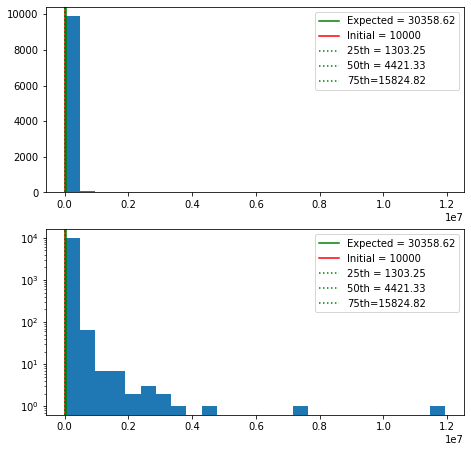

In [ ]:
# Compute the money left after 20 trades with 30% risked per trade for
# 100,000 trials

n_experiments = 10000

max_trades = 20
money_at_start = 10000
price_per_option = 100
options = 1
trade_fraction = 0.3

end_money = []

for experiment in range(n_experiments):
    current_money = money_at_start
    money_track = []
    for i in range(max_trades):
        if current_money < 100:
            # print(f"YOU ARE TOO POOR TO GAMBLE. Current amount: {current_money}")
            break
        else:
            options = np.round(current_money * trade_fraction / price_per_option)
            new_money = calculate_money_at_option_expiry(
                current_money, options, price_per_option)
        
        money_track.append(new_money)
        current_money = new_money
    # plt.plot(np.linspace(1,i+1,i+1), money_track) 
    # plt.show()
    end_money.append(current_money)


# Plot a histogram of the results and print out the metrics

fig, ax = plt.subplots(nrows=2, ncols=1,  figsize=(7.5,7.5))

ax[0].hist(end_money, bins=25)
ax[0].axvline(x = np.mean(end_money), label=f"Expected = {round(np.mean(end_money),2)}", color="g")
ax[0].axvline(x = money_at_start, label=f"Initial = {money_at_start}", color="r")
ax[0].axvline(x = np.percentile(end_money, 25), label=f"25th = {round(np.percentile(end_money, 25),2)}", linestyle=':', color="g")
ax[0].axvline(x = np.percentile(end_money, 50), label=f"50th = {round(np.percentile(end_money, 50),2)}", linestyle=':', color="g")
ax[0].axvline(x = np.percentile(end_money, 75), label=f"75th={round(np.percentile(end_money, 75),2)}", linestyle=':', color="g")
ax[0].legend()


ax[1].hist(end_money, bins=25, log=True)
ax[1].axvline(x = np.mean(end_money), label=f"Expected = {round(np.mean(end_money),2)}", color="g")
ax[1].axvline(x = money_at_start, label=f"Initial = {money_at_start}", color="r")
ax[1].axvline(x = np.percentile(end_money, 25), label=f"25th = {round(np.percentile(end_money, 25),2)}", linestyle=':', color="g")
ax[1].axvline(x = np.percentile(end_money, 50), label=f"50th = {round(np.percentile(end_money, 50),2)}", linestyle=':', color="g")
ax[1].axvline(x = np.percentile(end_money, 75), label=f"75th={round(np.percentile(end_money, 75),2)}", linestyle=':', color="g")
ax[1].legend()

plt.show()




## Task 4 (optional)

Determine the optimal fraction of your money to risk on each trade. It's not 30%. Which metric(s) should you use for this optimization?

## From Class Session

In [ ]:
def plot_results(results, log_scale=False, title=None):
    # Plot a histogram of the results and print out the metrics
    results_mean = np.mean(results)
    results_median = np.median(results)
    results_25th = np.percentile(results, 25)
    results_75th = np.percentile(results, 75)
    risk_loss = np.mean(results < money_at_start)
    risk_ruin = np.mean(results < price_per_option)

    # Plot results using 100 histogram bins
    plt.figure(figsize=(8, 6))
    if title is None:
        title = (
            r'Histogram of $\log_{10}$ results'
            if log_scale else
            'Histogram of results')
    plt.title(title)
    plt.xlabel('Money after options expired')

    plt.hist(np.log10(results) if log_scale else results, bins=100)
    plt.axvline(
        np.log10(money_at_start) if log_scale else money_at_start,
        color='red', linestyle='-',
        label=f'initial money = {money_at_start:.2f}')
    plt.axvline(
        np.log10(results_mean) if log_scale else results_mean,
        color='orange', linestyle='-',
        label=f'mean final money = {results_mean:.2f}')
    plt.axvline(
        np.log10(results_25th) if log_scale else results_25th,
        color='orange', linestyle=':',
        label=f'25th percentile final money = {results_25th:.2f}')
    plt.axvline(
        np.log10(results_median) if log_scale else results_median,
        color='orange', linestyle=':',
        label=f'median final money = {results_median:.2f}')
    plt.axvline(
        np.log10(results_75th) if log_scale else results_75th,
        color='orange', linestyle=':',
        label=f'75th percentile final money = {results_75th:.2f}')
    plt.legend()
    plt.show()

    print(f'Money at start:     {money_at_start:9.2f}\n')
    print(f'Money at end')
    print(f' * mean:            {results_mean:9.2f}')
    print(f' * 25th percentile: {results_25th:9.2f}')
    print(f' * median:          {results_median:9.2f}')
    print(f' * 75th percentile: {results_75th:9.2f}\n')
    print(f'Risk of loss: {risk_loss * 100:14.1f}%')
    print(f'Risk of ruin: {risk_ruin * 100:14.1f}%')

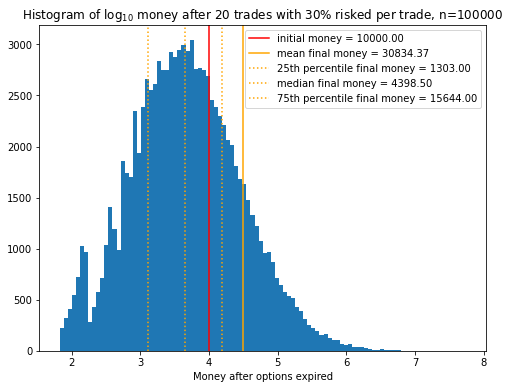

Money at start:      10000.00

Money at end
 * mean:             30834.37
 * 25th percentile:   1303.00
 * median:            4398.50
 * 75th percentile:  15644.00

Risk of loss:           67.1%
Risk of ruin:            0.9%


In [ ]:
# Compute the money left after 20 trades with 30% risked per trade for
# 100,000 trials

money_at_start = 10000
price_per_option = 100
max_trades = 20
trade_fraction = 0.3
trials = 100000

money_at_end = np.full(trials, money_at_start)
for i in range(max_trades):
    index = np.where(money_at_end >= price_per_option)[0]
    if len(index) == 0:
        break
    money = money_at_end[index]
    options_to_buy = np.round(money * trade_fraction / price_per_option)
    money = calculate_money_at_option_expiry(
        money, options_to_buy, price_per_option)
    money_at_end[index] = money

# Plot a histogram of the results and print out the metrics
plot_results(money_at_end, log_scale=True,
             title=fr'Histogram of $\log_{{10}}$ money after {max_trades} '
                   fr'trades with {trade_fraction*100:.0f}% risked per trade, n={trials}')

In [ ]:
def run_experiment(trade_fraction):

    # Run the simulation
    money_at_start = 10000
    price_per_option = 100
    max_trades = 20
    trials = 100000

    money_at_end = np.full(trials, money_at_start)
    for i in range(max_trades):
        index = np.where(money_at_end >= price_per_option)[0]
        if len(index) == 0:
            break
        money = money_at_end[index]
        options_to_buy = np.round(money * trade_fraction / price_per_option)
        money = calculate_money_at_option_expiry(
            money, options_to_buy, price_per_option)
        money_at_end[index] = money

    # Calculate the metrics
    mean = np.mean(money_at_end)
    median = np.median(money_at_end)
    percentile_25 = np.percentile(money_at_end, 25)
    percentile_75 = np.percentile(money_at_end, 75)
    risk_loss = np.mean(money_at_end < money_at_start)
    risk_ruin = np.mean(money_at_end < price_per_option)

    return mean, median, percentile_25, percentile_75, risk_loss, risk_ruin

In [ ]:
trade_fractions = np.linspace(0, 0.3, 16)
plot_data = {key: [] for key in ['mean', 'p25', 'p50', 'p75', 'risk_ruin', 'risk_loss']}
for trade_fraction in trade_fractions:
    metrics = run_experiment(trade_fraction)
    plot_data['mean'].append(metrics[0])
    plot_data['p50'].append(metrics[1])
    plot_data['p25'].append(metrics[2])
    plot_data['p75'].append(metrics[3])
    plot_data['risk_loss'].append(metrics[4])
    plot_data['risk_ruin'].append(metrics[5])

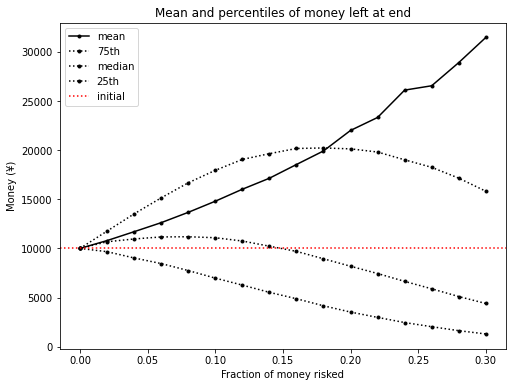

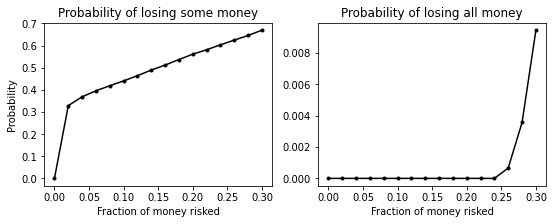

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Mean and percentiles of money left at end')
plt.xlabel('Fraction of money risked')
plt.ylabel('Money (¥)')
plt.plot(trade_fractions, plot_data['mean'], 'k.-', label='mean')
plt.plot(trade_fractions, plot_data['p75'], 'k.:', label='75th')
plt.plot(trade_fractions, plot_data['p50'], 'k.:', label='median')
plt.plot(trade_fractions, plot_data['p25'], 'k.:', label='25th')
plt.axhline(money_at_start, color='r', linestyle=':', label='initial')
plt.legend()

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title('Probability of losing some money')
plt.xlabel('Fraction of money risked')
plt.ylabel('Probability')
plt.plot(trade_fractions, plot_data['risk_loss'], 'k.-')

plt.subplot(1, 2, 2)
plt.title('Probability of losing all money')
plt.xlabel('Fraction of money risked')
plt.plot(trade_fractions, plot_data['risk_ruin'], 'k.-')

plt.show()